In [39]:
import torch
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import head_view

In [27]:
def get_list_from_path(path):
    df = pd.read_csv(path, header=None)
    li = df[0].tolist()
    li.sort(key=len)
    return li

def get_attention_tokens(model, tokenizer, seq):
    inputs = tokenizer.encode(seq, return_tensors='pt')
    outputs = model(inputs)
    attention = outputs[-1]  # Output includes attention weights when output_attentions=True
    tokens = tokenizer.convert_ids_to_tokens(inputs[0])
    return attention, tokens

In [4]:
utils.logging.set_verbosity_error()  # Suppress standard warnings
model = AutoModel.from_pretrained("sshleifer/tiny-gpt2", output_attentions=True).eval()
tokenizer = AutoTokenizer.from_pretrained("sshleifer/tiny-gpt2",
                                          bos_token='<|startoftext|>',
                                          eos_token='<|endoftext|>', 
                                          pad_token='<|pad|>', 
                                          truncation_side='left', 
                                          padding_side='left')
model.resize_token_embeddings(len(tokenizer))

Embedding(50259, 2)

In [29]:
seq_list = get_list_from_path("/data/corpora/SmartIsar/IsarStep/train.src")
attention, tokens = get_attention_tokens(model, tokenizer, seq_list[0])
head_view(attention, tokens)

<IPython.core.display.Javascript object>

In [6]:
model.wte.weight.shape

torch.Size([50259, 2])

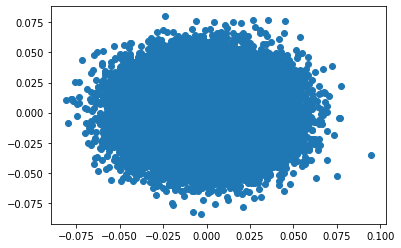

In [43]:
xs = [x.detach().numpy() for x in model.wte.weight]
plt.scatter(*zip(*xs))

In [17]:
idx_list = range(50259)
token_list = tokenizer.decode(idx_list)

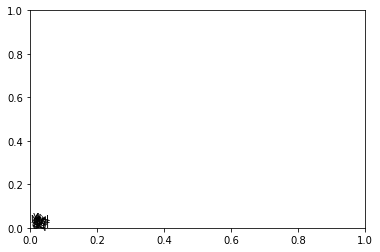

In [40]:
for i, x in enumerate(xs[100:200]):
    plt.annotate(token_list[i],xy=(x[0],x[1]))